### OBJECTIVE : 
To analyze the Amazon sales report for insights to optimize operations, enhance customer experience, and drive revenue  growth.

### IMPORT LIBRARIES

In [1]:
import pandas as pd #To work on Dataframe
import numpy as np #To work on Array
import seaborn as sns #To work on Charts & Visualizations
import matplotlib.pyplot as plt #To work on Charts & Visualizations
from matplotlib.pyplot import show #Displaying plots and figures created using Matplotlib

### READ DATASET

In [2]:
df = pd.read_csv("C:\\Users\\Snehal Mane\\Downloads\\Amazon Sale Report.csv")

In [3]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


### PERFORM DATA ANALYSIS

In [4]:
# Information of each columns in Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
# Find out the no. of Rows & Columns in a DataFrame
df.shape

(128976, 21)

### DATA CLEANING

In [6]:
# Remove Rows/Columns from dataFrame 
df.drop(['New','PendingS'],axis=1,inplace=True)

In [7]:
# Find out how many missing valuesin each columns in a dataframe
df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [8]:
# Fill missing values in a Dataframe
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [9]:
df.isna().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [10]:
# Check Datatype 
df['Date'].dtypes

dtype('O')

In [11]:
# Convert a column of a DataFrame to datatime Format
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Date'].dtypes

dtype('<M8[ns]')

In [13]:
# Check Datatype 
df['Amount'].dtypes

dtype('float64')

In [14]:
# Change Datatype of Column
df['Amount']=df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes

dtype('int32')

## EXPLORATORY DATA ANALYSIS (EDA)

### SALES OVERVIEW

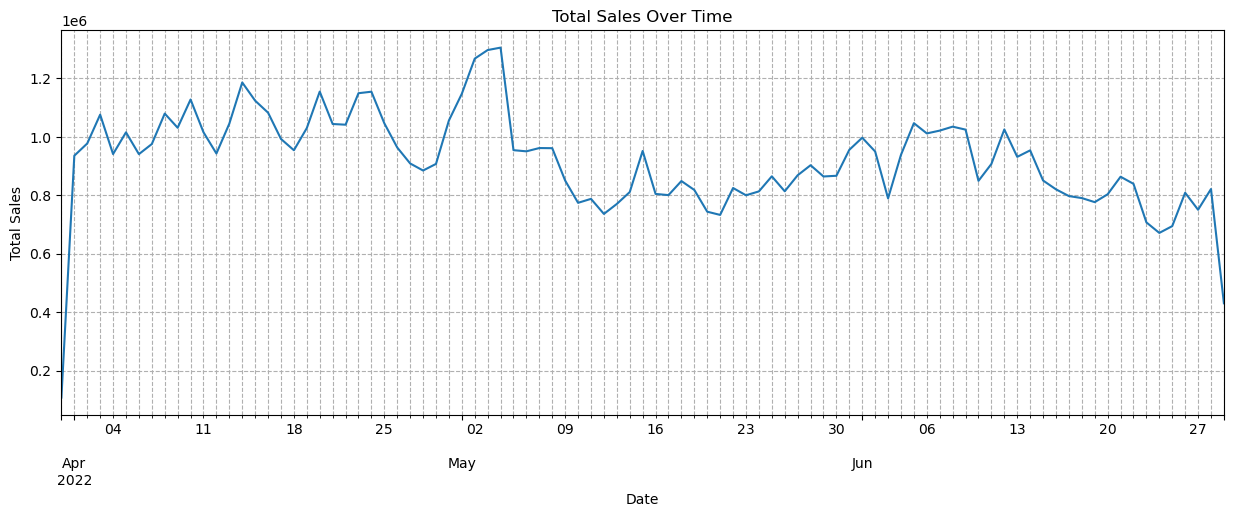

In [16]:
# Display the plot
plt.figure(figsize=(15,5))

# Grouping the sales by date and summing the amounts
sales=df.groupby(by='Date')['Amount'].sum()

# Plotting the total sales over time
sales.plot(kind='line', title='Total Sales Over Time' )
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Adding custom gridlines
plt.grid(which='both',linestyle='--')

# Display the plot
plt.show()

Sales were highest in early May, reaching over 1.2 million. After that, they varied and declined, showing that the initial boost didn’t last.

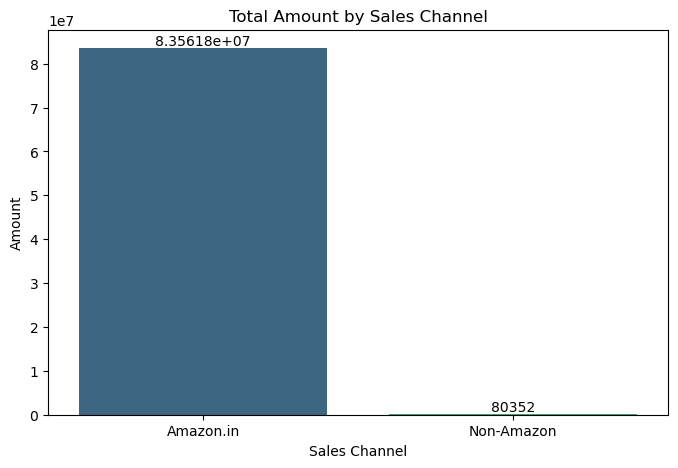

In [17]:
# Set figure size
plt.figure(figsize=(8,5))

# Grouping sales by 'Sales Channel' and summing the Amounts
sales_status= df.groupby(['Sales Channel'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# Create bar plot
ax=sns.barplot(data=sales_status,x='Sales Channel',y='Amount',palette='viridis')

# Add title
plt.title('Total Amount by Sales Channel')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The bar chart shows Amazon.in sales at 83 million, much higher than non-Amazon sales at 80,352, indicating Amazon.in is a major sales channel.

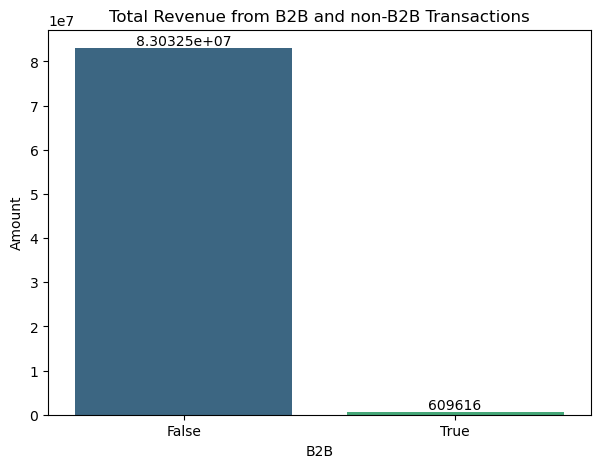

In [18]:
# Set figure size
plt.figure(figsize=(7,5))

# Grouping sales by 'B2B' and summing the Amounts
status_by_fulfillment = df.groupby(by='B2B',as_index=False)[ 'Amount'].sum().sort_values(by='Amount',ascending=False)

# Create bar plot
ax = sns.barplot(data=status_by_fulfillment,x='B2B',y='Amount',palette='viridis')

# Add title
plt.title('Total Revenue from B2B and non-B2B Transactions')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The bar chart shows that total revenue from non-B2B sales is significantly higher at 83 million compared to B2B sales at 609,616, indicating non-B2B is the primary revenue source.

### PRODUCT ANALYSIS

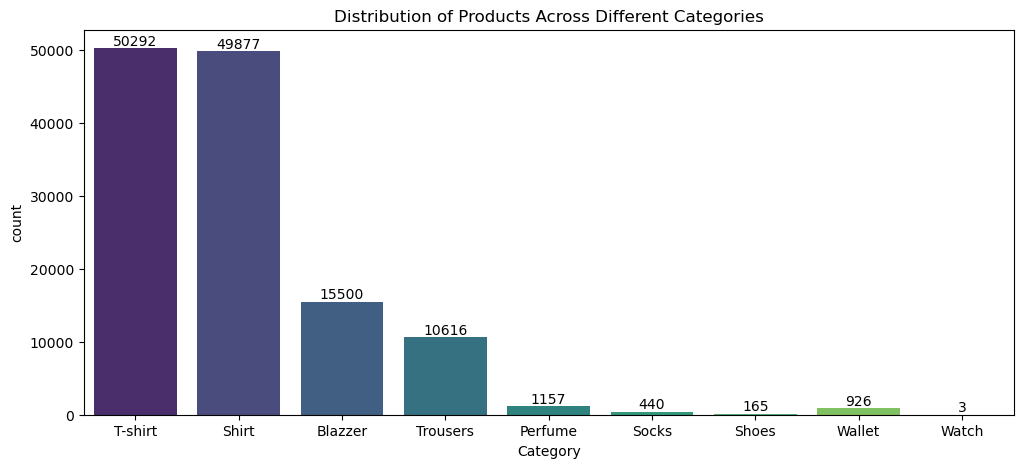

In [19]:
# Set figure size
plt.figure(figsize=(12,5))

# Create Countplot for Category
ax=sns.countplot(data=df,x='Category',palette='viridis')

# Add Title
ax.set_title('Distribution of Products Across Different Categories')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

T-shirts and shirts are the most sold products, with over 50,000 units each, while items like watches, shoes, and socks have the least sales.

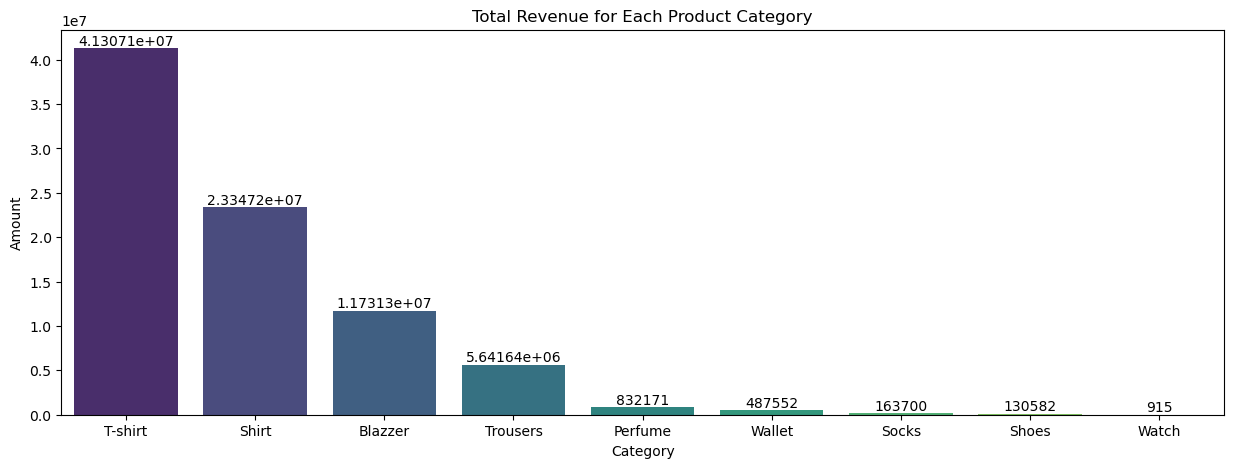

In [20]:
# Set figure size
plt.figure(figsize=(15,5))

# Group by 'Category' and sum 'Amount', then sort
product_cat=df.groupby(by='Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# Create bar plot
ax=sns.barplot(x='Category',y='Amount',data=product_cat,palette='viridis')

# Add title
ax.set_title('Total Revenue for Each Product Category')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()


T-shirts generate the highest revenue at over 41 million, followed by shirts at over 23 million. Watches, shoes, and socks generate the least revenue. This indicates that clothing items, particularly T-shirts and shirts, are the top-selling categories.

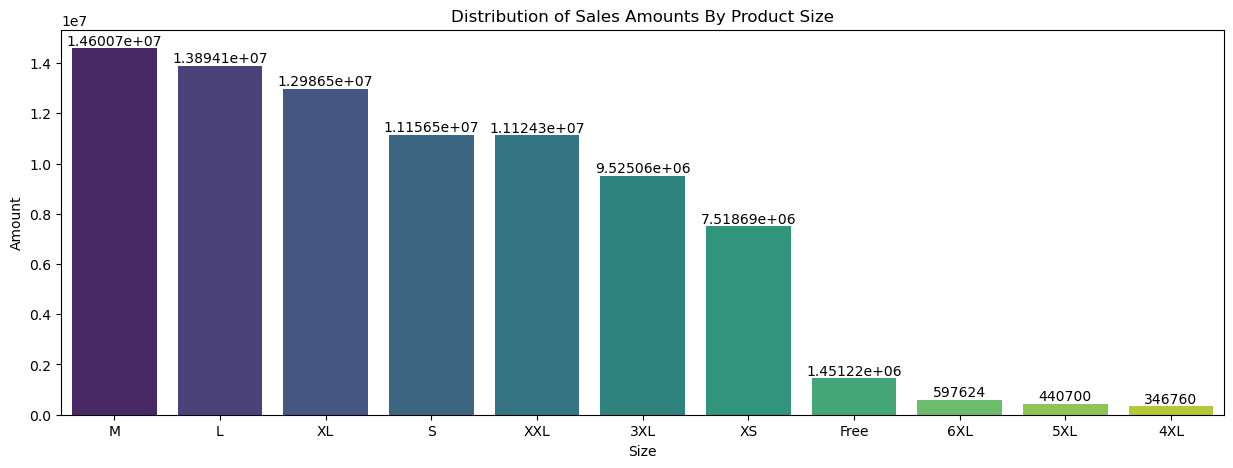

In [21]:
# Set figure size
plt.figure(figsize=(15,5))

# Group by 'Size' and sum 'Amount', then sort
size_dist=df.groupby(by='Size',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# Create bar plot
ax=sns.barplot(data=size_dist,x='Size',y='Amount',palette='viridis')

# Add Title
ax.set_title('Distribution of Sales Amounts By Product Size')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The sales data indicates that Medium (M), Large (L), and Extra Large (XL) sizes generate the highest revenue, while Free, 6XL, 5XL, and 4XL sizes have the lowest revenue.

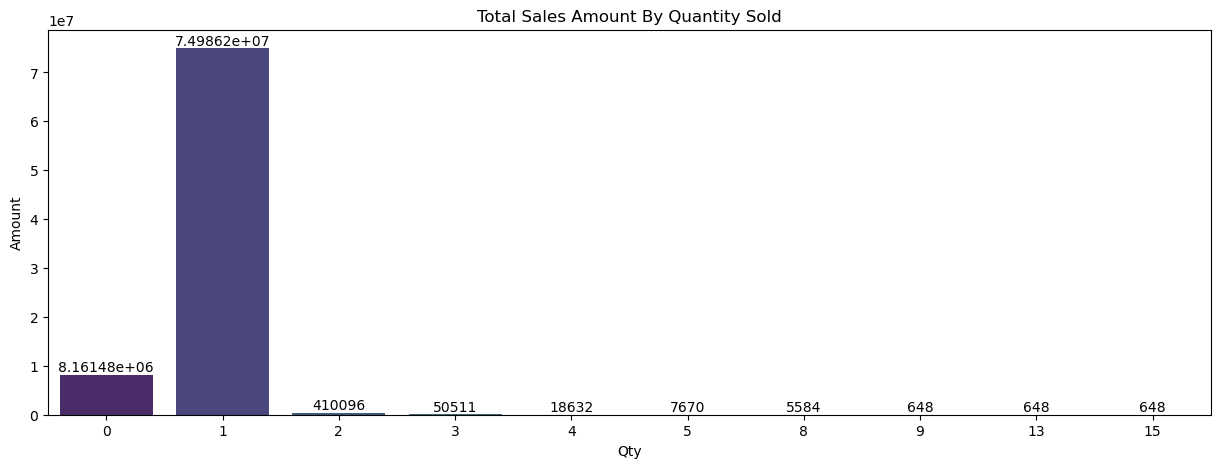

In [22]:
# Set figure size
plt.figure(figsize=(15,5))

# Group by 'Qty' and sum 'Amount', then sort
qty_sold=df.groupby(by='Qty',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# Create Barplot
ax=sns.barplot(data=qty_sold,x='Qty',y='Amount',palette='viridis')

# Add Title
ax.set_title( 'Total Sales Amount By Quantity Sold')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The quantity sold data shows that the majority of sales involve purchasing a single item, with significantly fewer sales involving multiple quantities. The highest revenue is generated from single-item purchases, while sales of two or more items are much less frequent and contribute less to the overall revenue.

### FULFILLMENT ANALYSIS

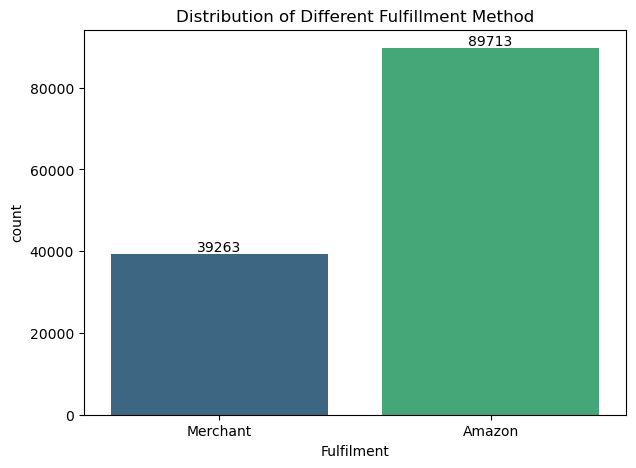

In [23]:
# Set figure size
plt.figure(figsize=(7,5))

# Create Countplot
ax=sns.countplot(data=df,x='Fulfilment',palette='viridis')

# Add title
ax.set_title('Distribution of Different Fulfillment Method')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

Amazon fulfillment, with 89,713 counts, is over twice as utilized as Merchant fulfillment, which has 39,263 counts. This indicates a strong preference for Amazon's services.

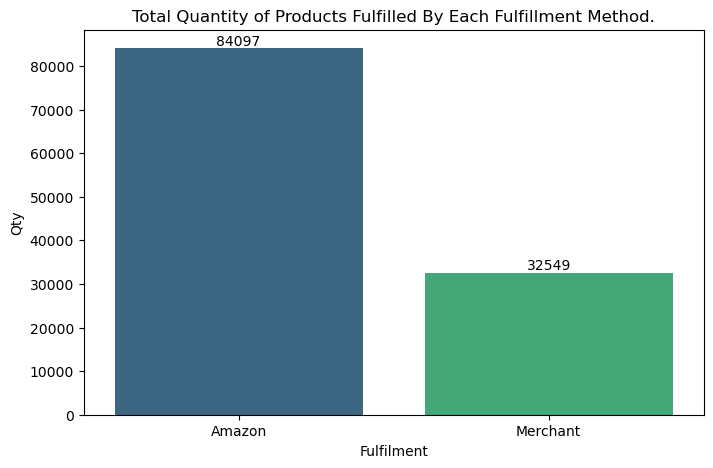

In [24]:
# Set figure size
plt.figure(figsize=(8,5))

# Group data by Fulfilment and sum quantities
status_by_fulfillment = df.groupby(by='Fulfilment',as_index=False)[ 'Qty'].sum().sort_values(by='Qty',ascending=False)

# Create Barplot
ax=sns.barplot(data=status_by_fulfillment,x='Fulfilment',y='Qty',palette='viridis')

# Add title
plt.title('Total Quantity of Products Fulfilled By Each Fulfillment Method.')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

Amazon fulfillment handles a much larger quantity of items (84,097) compared to Merchant fulfillment (32,549), fulfilling more than twice the number of items. This shows a strong preference for Amazon's services.

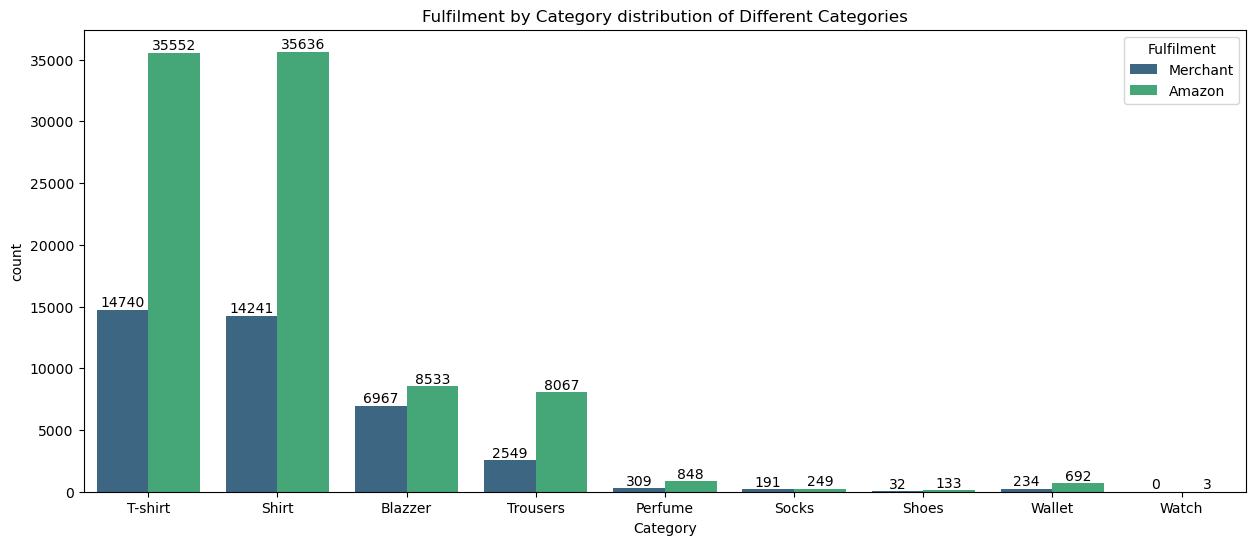

In [25]:
# Set figure size
plt.figure(figsize=(15,6))

# Create Countplot
ax=sns.countplot(data=df,x='Category',hue='Fulfilment',palette='viridis')

# Add Title
plt.title('Fulfilment by Category distribution of Different Categories')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

Amazon consistently handles more items across all categories compared to Merchant fulfillment. Notably, T-shirts and Shirts have the highest counts, with Amazon fulfilling over twice as many items as Merchants in these categories. This indicates a strong preference for Amazon's fulfillment services.

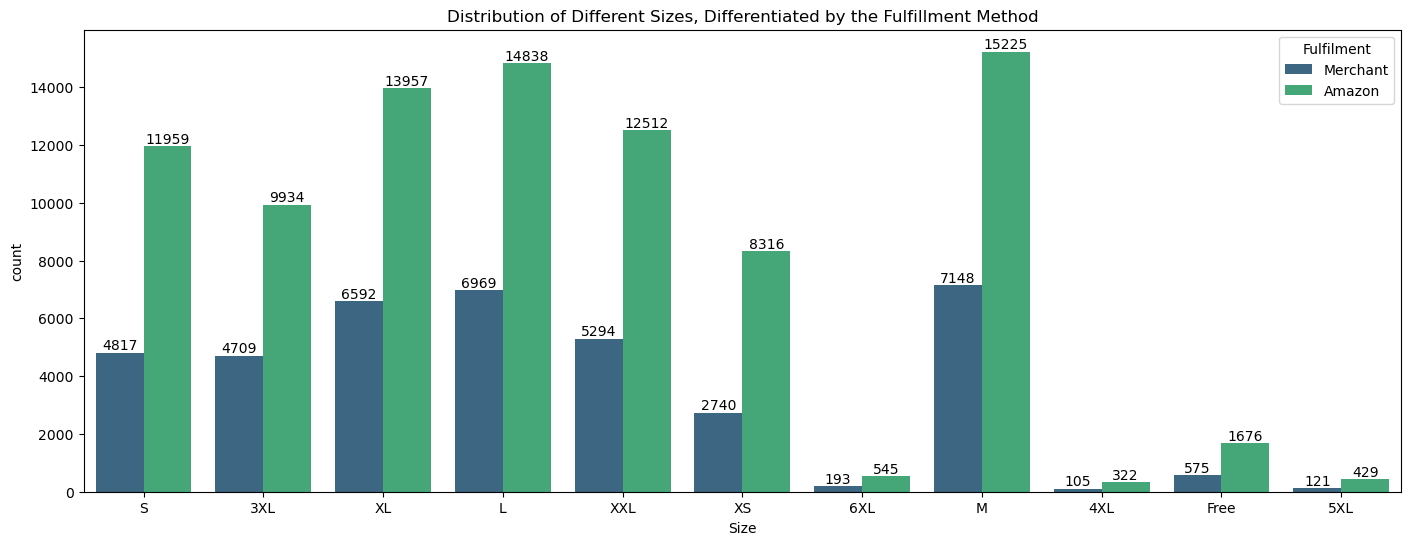

In [26]:
# Set figure size
plt.figure(figsize=(17,6))

# Create Countplot
ax=sns.countplot(data=df,x='Size',hue='Fulfilment',palette='viridis')

# Add Title
plt.title('Distribution of Different Sizes, Differentiated by the Fulfillment Method')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The bar chart shows that Amazon fulfills more orders than merchants across all sizes. Medium (M) size has the highest fulfillment by Amazon, followed by Large (L) and Extra Large (XL). For merchant fulfillment, Medium (M) and Extra Large (XL) sizes also have the highest counts. Sizes like 6XL, 4XL, Free, and 5XL have significantly fewer orders fulfilled by both Amazon and merchants.

<Figure size 2000x800 with 0 Axes>

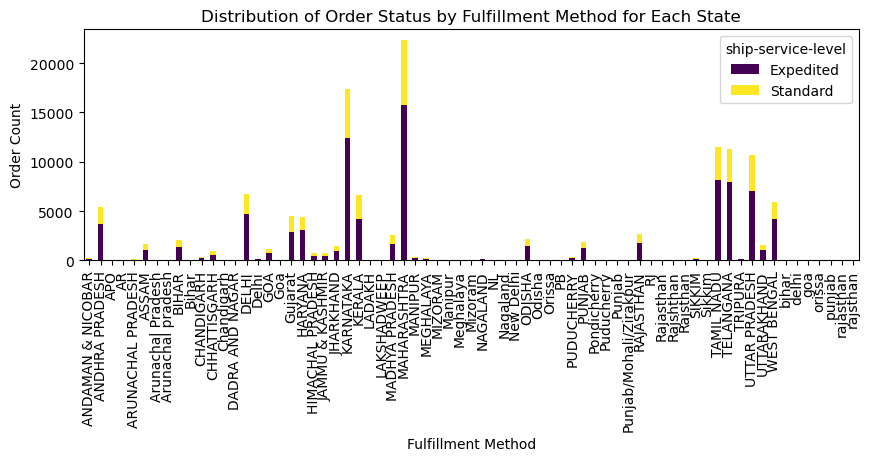

In [27]:
# Set figure size
plt.figure(figsize=(20,8))

# Group by 'ship-state' and 'ship-service-level'
status_by_fulfillment = df.groupby(['ship-state','ship-service-level']).size().unstack()

# Plot the data
status_by_fulfillment.plot(kind='bar', stacked=True, figsize=(10, 3),  colormap='viridis')

# Add title and labels
plt.title('Distribution of Order Status by Fulfillment Method for Each State')
plt.xlabel('Fulfillment Method')
plt.ylabel('Order Count')

# Display the plot
plt.show()

Maharashtra has the highest order count, followed by Karnataka and Tamil Nadu. Expedited fulfillment is more common than standard fulfillment across all states.







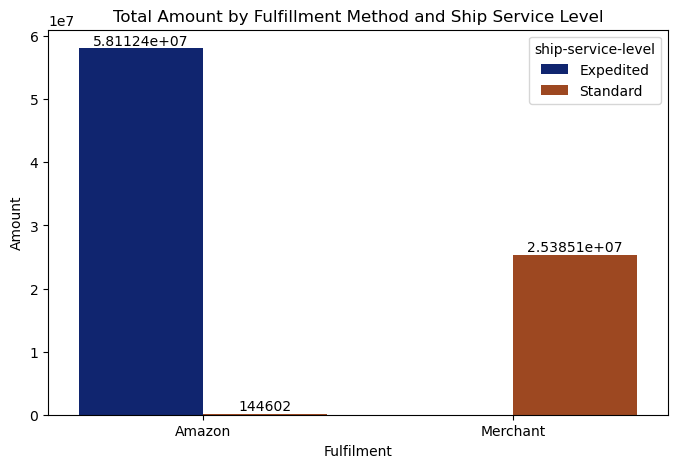

In [28]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Group data by 'Fulfilment' and 'ship-service-level' and sum the 'Amount'
sales_status= df.groupby(['Fulfilment','ship-service-level'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# Create Barplot
ax=sns.barplot(data=sales_status,x='Fulfilment',y='Amount',hue='ship-service-level',palette='dark')

# Add title and labels
plt.title('Total Amount by Fulfillment Method and Ship Service Level')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The chart shows that the majority of the sales amount is fulfilled by Amazon using the "Expedited" shipping service, totaling approximately 58.1 million units. In contrast, the "Standard" shipping service by Amazon has a minimal amount of around 144,602 units. On the other hand, the "Merchant" fulfillment method, primarily using "Standard" shipping, has a sales amount of approximately 25.4 million units. Overall, majority of the total sales revenue is generated from orders shipped using Amazon's expedited shipping service.

### CUSTOMER SEGMENTATION

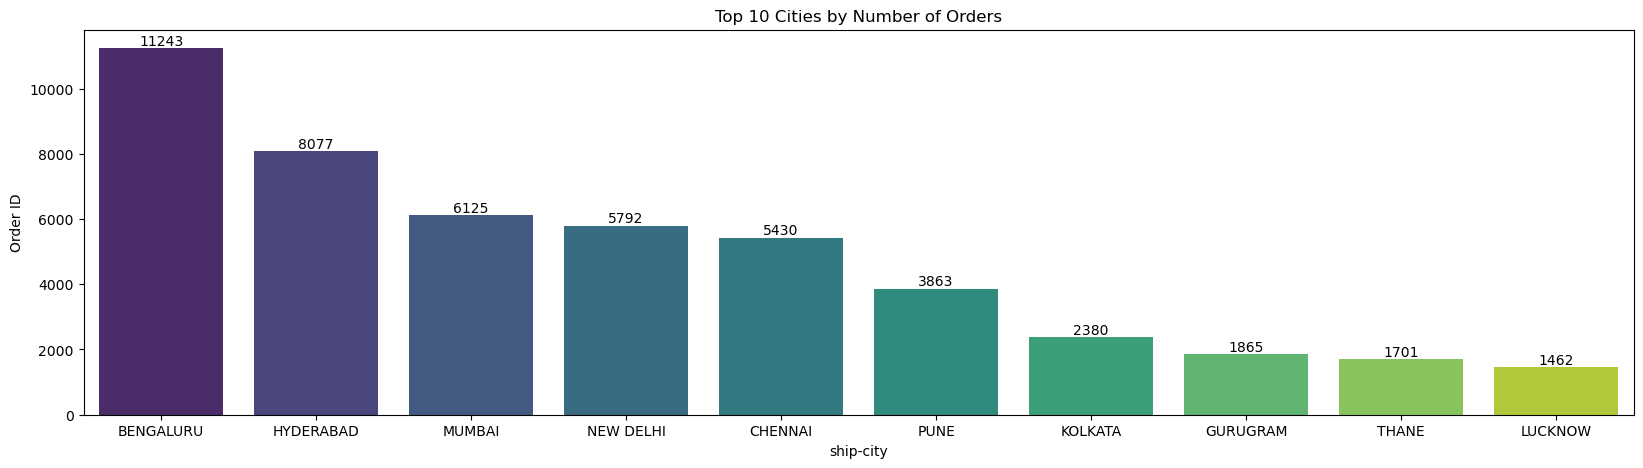

In [29]:
# Set the figure size
plt.figure(figsize=(20, 5))

# Group by 'ship-city' and count the number of 'Order ID', then sort and select the top 10
order_count = df.groupby(by='ship-city', as_index=False)['Order ID'].count().sort_values(by='Order ID', ascending=False).head(10)

# Create Barplot
ax = sns.barplot(data=order_count, x='ship-city', y='Order ID',palette='viridis')

# Add title and labels
plt.title('Top 10 Cities by Number of Orders')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The bar chart shows that Bengaluru has the highest number of orders, followed by Hyderabad and Mumbai. Lucknow has the lowest number of orders among the top 10 cities.

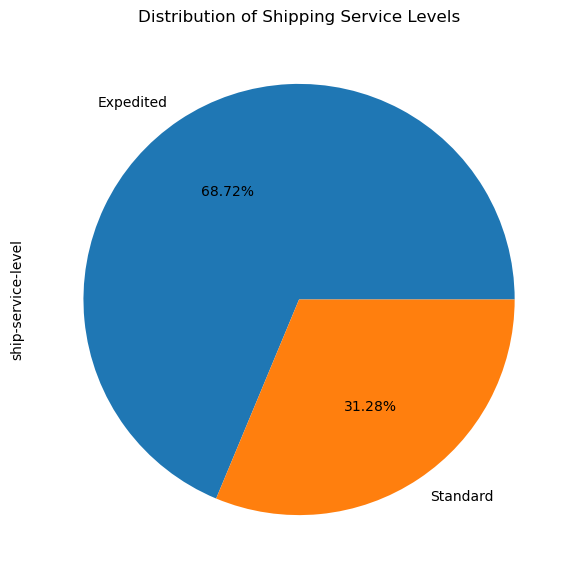

In [30]:
# Set the figure size
plt.figure(figsize=(20,7))

# Create Piechart
df['ship-service-level'].value_counts().plot(kind='pie',autopct='%1.2F%%')

# Add Title
plt.title('Distribution of Shipping Service Levels')

# Show the plot
plt.show()


The pie chart indicates that 68.72% of orders use Expedited shipping, while 31.28% use Standard shipping.

### GEOGRAPHICAL ANALYSIS

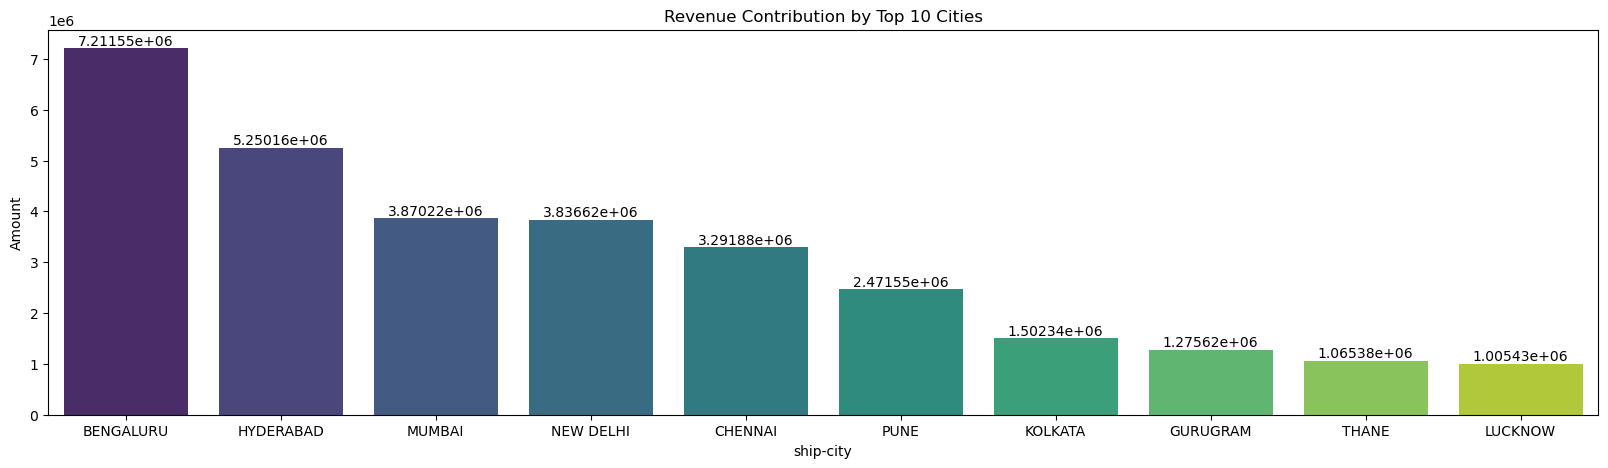

In [31]:
# Set the figure size
plt.figure(figsize=(20,5))

# Group by 'ship-city', sum the 'Amount', and get the top 10 cities by revenue
Rev_con=df.groupby(by='ship-city',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

# Create Barplot
ax=sns.barplot(data=Rev_con,x='ship-city',y='Amount',palette='viridis')

# Add Title
plt.title('Revenue Contribution by Top 10 Cities')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

The bar chart shows that Bengaluru generates the highest revenue, followed by Hyderabad and Mumbai. Lucknow generates the lowest revenue among the top 10 cities.

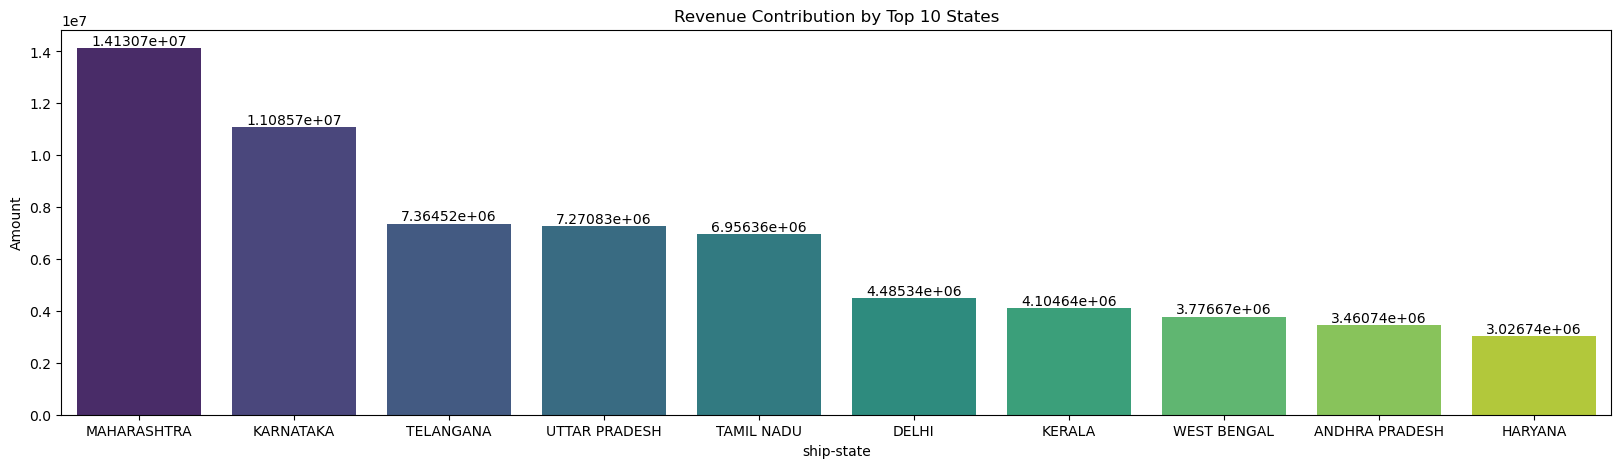

In [32]:
# Set the figure size
plt.figure(figsize=(20,5))

# Group by 'ship-state', sum the 'Amount', and get the top 10 states by revenue
sale_city=df.groupby(by='ship-state',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

# Create the bar plot
ax=sns.barplot(data=sale_city,x='ship-state',y='Amount',palette='viridis')

# Add Title
plt.title('Revenue Contribution by Top 10 States')

# Add Data labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.show()

Maharashtra generates the highest revenue among the top 10 states, followed by Karnataka and Telangana. Haryana generates the lowest revenue in the top 10.

## CONCLUSION

Sales peaked in early May at over 1.2 million but declined afterward. Amazon.in dominates sales with 83 million, surpassing non-Amazon sales at 80,352. Non-B2B sales generate most revenue at 83 million, compared to B2B's 609,616. Top-selling items are T-shirts and shirts, each selling over 50,000 units, with T-shirts bringing in 41 million and shirts 23 million in revenue. Single-item purchases are most common. Amazon fulfillment is preferred over Merchant fulfillment, with Medium, Large, and Extra Large sizes most fulfilled. Maharashtra leads in order count, followed by Karnataka and Tamil Nadu. Expedited shipping by Amazon drives sales revenue at 58.1 million units. Bengaluru leads in both order count and revenue among cities, while Maharashtra tops revenue among states.